### Periodic Function

$f(x_{0},x_{1}) = (\sin (2 \pi \nu_{0} x_{0}) \cos(2 \pi \nu_{1} x_{1}) +1)$

where $\nu$ is the frequency.

To define a likelihood function, we first need a probabilistic model that explains how the data is generated.If we assume the observed data $y$ is generated from your function plus some Gaussian noise with standard deviation $\sigma$, i.e., 

$y = \sin(2 \pi \nu_{0} x_{0}) \cos(2 \pi \nu_{1} x_{1}) + 1 + \epsilon$

where $\epsilon \sim N(0, \sigma^2)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from typing import List

from HMC import HMC
import sys
sys.path.append("..")
from MCMC_DZ.BayesianInference.Dian_Likelihood_functions.Periodic_Function import Periodic_Func2D
from MCMC_DZ.MCMC.Statistic_tools import Target_Distribution_Visualization_3D,auto_corr_plot,densities_plot

In [2]:
PF  = Periodic_Func2D([1,2], [[0,2], [0,2]])

Target_Distribution_Visualization_3D(X_range=[-0.1, 2.1], Y_range=[-0.1, 2.1], Tar_Dis=PF.f, Func_name="2D Periodic Function", alpha=0.7)

In [23]:
from typing import List
import numpy as np
class PeriodicFunc2D:
    def __init__(self, X_range: List[List[float]], X, Y, sigma):

        """

        The Periodic Function

        Arguments
        ---------
        X_range (np.array): The range of each axis of the Periodic Function
        X (np.array): observations
        Y (np.array): observed data plus Gaussian noise
        sigma: noise level

        Returns
        -------
        None


        """

        self.X_range = X_range
        self.sigma = sigma
        self.X = X
        self.Y = Y

    def f(self, x, frequency):

        """
        
        The main functon of the Periodic Function

        Arguments
        ---------
        Freq (np.array): The frequency of each axis of the Periodic Function

        Returns
        -------
        (np.array): The output value of the Periodic Function repect to the inputed value
        
        
        """
        X = np.array(x)
        Freq = np.array(frequency)

        if (len(X.shape)==1):
            X0_in_range = np.logical_and(X[0] >= self.X_range[0][0], X[0] <= self.X_range[0][1])
            X1_in_range = np.logical_and(X[1] >= self.X_range[1][0], X[1] <= self.X_range[1][1])
            if (X0_in_range & X1_in_range):
                return (np.sin(2 * np.pi * Freq[0] * X[0]) * np.cos(2 * np.pi * Freq[1] * X[1]) + 1)/2
            else:
                return 0
        else:
            X0_in_range = np.logical_and(X[:, 0] >= self.X_range[0][0], X[:, 0] <= self.X_range[0][1])
            X1_in_range = np.logical_and(X[:, 1] >= self.X_range[1][0], X[:, 1] <= self.X_range[1][1])
            in_range = np.logical_and(X0_in_range, X1_in_range)
            Res = np.zeros(X.shape[0])
            Res[in_range] = (np.sin(2 * np.pi * Freq[0] * X[in_range, 0]) * np.cos(2 * np.pi * Freq[1] * X[in_range, 1]) + 1)/2
            return Res

    def calculate_loglikelihood(self, frequency):
        y = self.Y
        sigma = self.sigma
        mu = self.f(self.X, frequency)
        return -np.sum((y - mu)**2 / (2 * sigma**2)) - len(y) * np.log(np.sqrt(2 * np.pi) * sigma)

    def calculate_loglikelihood_array(self, frequency):
        y = self.Y
        sigma = self.sigma

        # array of values
        y = self.Y[np.newaxis, :, np.newaxis]  # reshape y to allow broadcasting
        mu = self.f(self.X, frequency)
        return -np.sum((y - mu)**2 / (2 * sigma**2), axis=0) - len(y) * np.log(np.sqrt(2 * np.pi) * sigma)

In [3]:
def pdf_PF(x, frequency):
    '''
    2D periodic function
    x = [x0, x1]
    frequency = [v0, v1]
    '''
    x = np.array(x)
    frequency = np.array(frequency)
    if len(x.shape)==1:
        Res = (np.sin(2 * np.pi * frequency[0] * x[0]) * np.cos(2 * np.pi * frequency[1] * x[1]) + 1)/2
    else:
        Res = (np.sin(2 * np.pi * frequency[0] * x[:,0]) * np.cos(2 * np.pi * frequency[1] * x[:,1]) + 1)/2
    return Res

In [4]:
def logpdf_PF(x, frequency):
    '''
    the log pdf
    '''
    return np.log(pdf_PF(x, frequency))

In [66]:
# True parameter values
v_true= [1,2]
noise_true=0.1 #sigma
N=1000
sigma=0.1
frequency=[1,2]
X_range=[[0,1],[0,1]]

x0 = np.linspace(0, 1, 100)
x1 = np.linspace(0, 1, 100)
x0_grid, x1_grid = np.meshgrid(x0, x1)
f = (np.sin(2 * np.pi * 1 * x0_grid) * np.cos(2 * np.pi * 2 * x1_grid) + 1)/2
# f = pdf_PF(v0=v0_true,v1=v1_true,x0=x0_grid,x1=x1_grid)

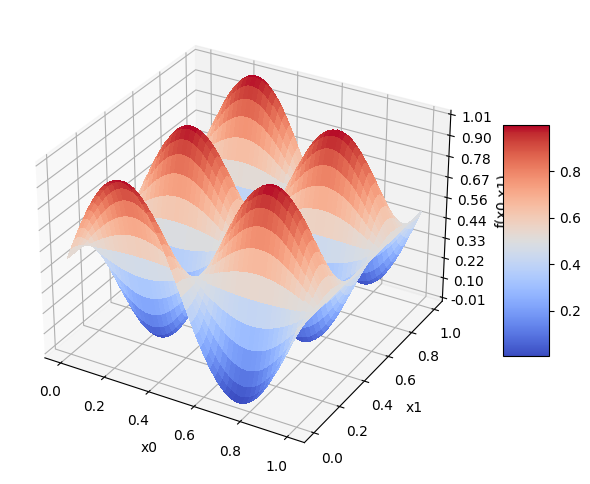

In [67]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x0_grid, x1_grid, f, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# Customize the z axis.
ax.set_zlim(-0.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('f(x0,x1)')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [68]:
np.random.seed(12345)
# f_true = pdf_PF(frequency=v_true,x=np.column_stack((x0,x1)))
# x0_observed = x0 + noise_true*np.random.randn(N)
# x1_observed = x1 + noise_true*np.random.randn(N)
x0_observed = np.random.uniform(0, 1, N)
x1_observed = np.random.uniform(0, 1, N)
PF_datasets = np.column_stack((x0_observed,x1_observed))
PF_datasets_noisy = pdf_PF(PF_datasets,[1,2]) + np.random.normal(loc=0, scale=sigma, size=N)

In [69]:
PF2D = PeriodicFunc2D(X_range=X_range,X=PF_datasets, Y=PF_datasets_noisy, sigma=sigma)

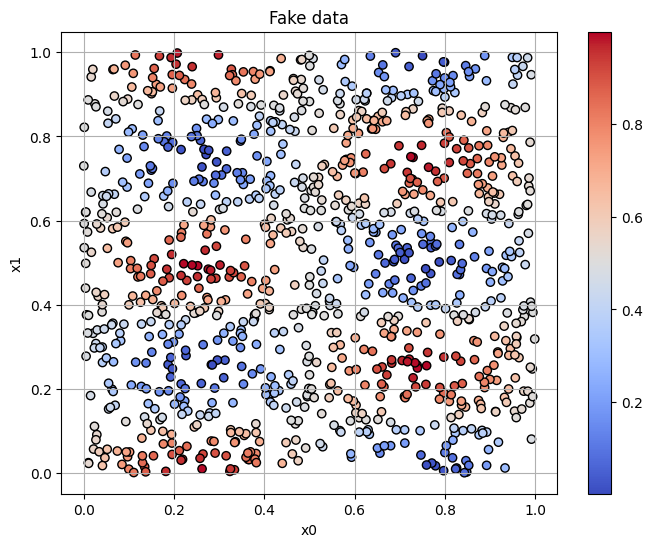

In [70]:
# Create scatter plot of original data points
plt.figure(figsize=(8,6))
# plt.scatter(x0_observed, x1_observed, c=(np.sin(2 * np.pi * 1 * x0_observed) * np.cos(2 * np.pi * 2 * x1_observed) + 1)/2, cmap='coolwarm', edgecolor='k')
plt.scatter(x0_observed, x1_observed, c=pdf_PF(x=np.array([[x0_observed,x1_observed]]),frequency=[1,2]), cmap='coolwarm', edgecolor='k')
plt.colorbar()  # Display a color bar
plt.title('Fake data')
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid(True)
plt.show()

In [10]:
def log_likelihoods_PF(params):
    '''
    Pass this function to MCMCs so that parmameters can be inputted.
    Calculates the total log-likelihood of the Gaussian Mixture Model for the given parameter.
    
        The likelihood is calculated as the product of individual pdfs at the observed samples:
        L(θ) = p(x_1, x_2, ..., x_N|θ) = Π_j=1^N p(x_j|θ)

        Since likelihood of each point may be very small, leading to extremely small products, 
        a log likelihood is often used in practice:
        logL(θ) = Σ_j=1^N log(p(x_j|θ))

    Arguments
    params [list]: flattened 1D list containing the mean and covariance for each Gaussian component
                    in shape of [mean1, mean2, ..., meanK, cov11, cov12, ..., cov1D, cov21, cov22, ..., covK1, ..., covKD]
                    where K is the number of components, and D is the number of dimensions.
    
    Returns
    log_likelihoods [np.array]: log-likelihood from parameters

    '''

    log_likelihoods = 0

    log_likelihoods += PF2D.calculate_loglikelihood(frequency=params)
    
    return (log_likelihoods)

In [25]:
def dfdx(mu):
    '''
    Forward differencing scheme
    '''
    epsilon = 0.001
    n_dims = 2
    n_comp = 1
    mu = np.array(mu)
    delta_theta = []
    res_mu_plus = []
    for i in range(mu.shape[0]):
        E_plus = np.zeros(n_dims*n_comp)
        E_plus += [(epsilon if j == i else 0) for j in range(n_dims*n_comp)]
        res_mu_plus.append(E_plus)

    for i in range(n_dims*n_comp):
        delta_thetai = (log_likelihoods_PF(mu+res_mu_plus[i]) - log_likelihoods_PF(mu))/(epsilon)
        delta_theta.append(delta_thetai)
        
    return delta_theta

In [26]:
def U(theta: List[np.longdouble]) -> np.longdouble:
    '''
    the potential energy function: 
    U(theta) = -log(probability distribution of theta)
    '''
    return - log_likelihoods_PF(theta)

def grad_U(theta: List[np.longdouble]) -> np.longdouble:
    '''
    the derivative of the potential energy function
    dU/dmu
    '''
    DRho = dfdx(theta)
    Rho = - log_likelihoods_PF(theta)
    return np.array([dRho/Rho for dRho in DRho])

In [154]:
theta_accept, theta_reject = HMC(epoch=5000, L=40, epsilon=0.1, U=U, grad_U=grad_U, current_theta=np.array([0.8,1.8]))

In [155]:
len(theta_accept)

2

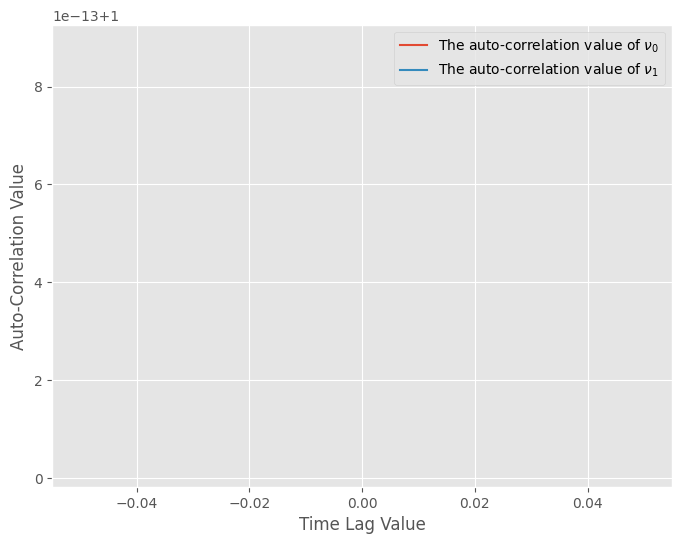

In [156]:
auto_corr_plot(theta_accept, plot_nth_theta=[0,1],theta_index=['$\\nu_{0}$', '$\\nu_{1}$'],max_time_lag=len(theta_accept),figsize=[8,6])

In [116]:
# Make data.
X = np.linspace(-1, 5, N, dtype=np.float32)
Y = np.linspace(-1, 5, N, dtype=np.float32)
X, Y = np.meshgrid(X, Y)
Z=np.zeros([N,N])
for i in range(N):
    for j in range(N):
        Z[i][j] += PF2D.calculate_loglikelihood([X[i][j],Y[i][j]])

In [147]:
# Make data
X1 = np.linspace(-10, 10, N, dtype=np.float32)
Y1 = np.linspace(-10, 10, N, dtype=np.float32)
X1, Y1 = np.meshgrid(X1, Y1)
Z11=np.zeros([N,N])
for i in range(N):
    for j in range(N):
        Z11[i][j] += PF2D.calculate_loglikelihood([X1[i][j],Y1[i][j]])

In [157]:
Z1=[]
for i in range(len(theta_accept)):
    Z1.append(PF2D.calculate_loglikelihood([theta_accept[i][0],theta_accept[i][1]]))

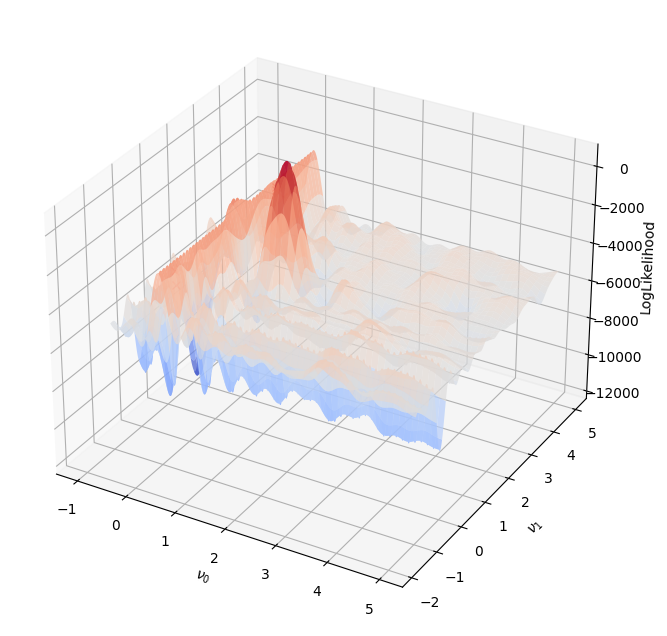

In [140]:
fig = plt.figure(figsize=(8, 8), facecolor="white")
ax = fig.add_subplot(projection='3d')

ax.plot_surface(X,Y,Z,alpha=0.7,cmap='coolwarm',label='logLikelihood')

ax.set_xlabel('$\\nu_{0}$')
ax.set_ylabel('$\\nu_{1}$')
ax.set_zlabel('LogLikelihood')

ax.plot(np.array(theta_accept)[:,0],np.array(theta_accept)[:,1],Z1,'x',color='red',label='Accepted points')

plt.show()

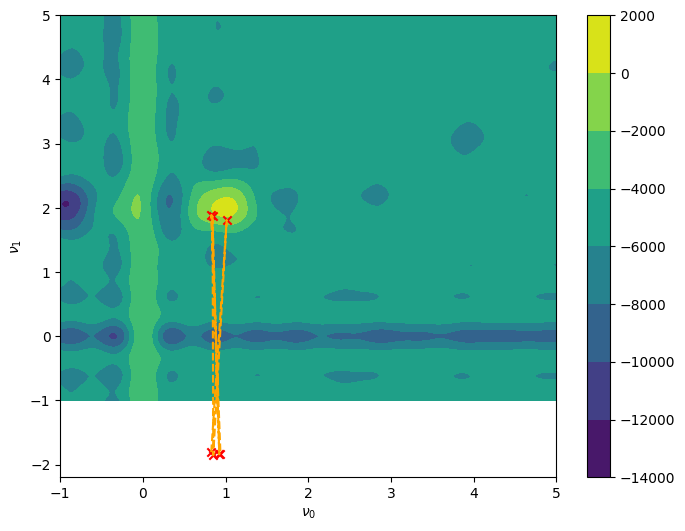

In [141]:
plt.contourf(X,Y,Z)
plt.colorbar()
plt.xlabel('$\\nu_{0}$')
plt.ylabel('$\\nu_{1}$')
plt.scatter(np.array(theta_accept)[:,0],np.array(theta_accept)[:,1],marker='x',color='red')
plt.plot(np.array(theta_accept)[:,0],np.array(theta_accept)[:,1],'--',color='orange')

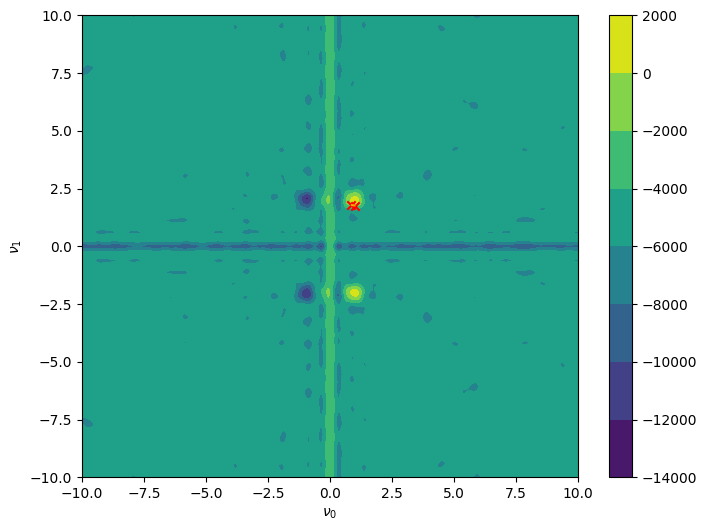

In [158]:
plt.contourf(X1,Y1,Z11)
plt.colorbar()
plt.xlabel('$\\nu_{0}$')
plt.ylabel('$\\nu_{1}$')
plt.scatter(np.array(theta_accept)[:,0],np.array(theta_accept)[:,1],marker='x',color='red')
plt.plot(np.array(theta_accept)[:,0],np.array(theta_accept)[:,1],'--',color='orange')

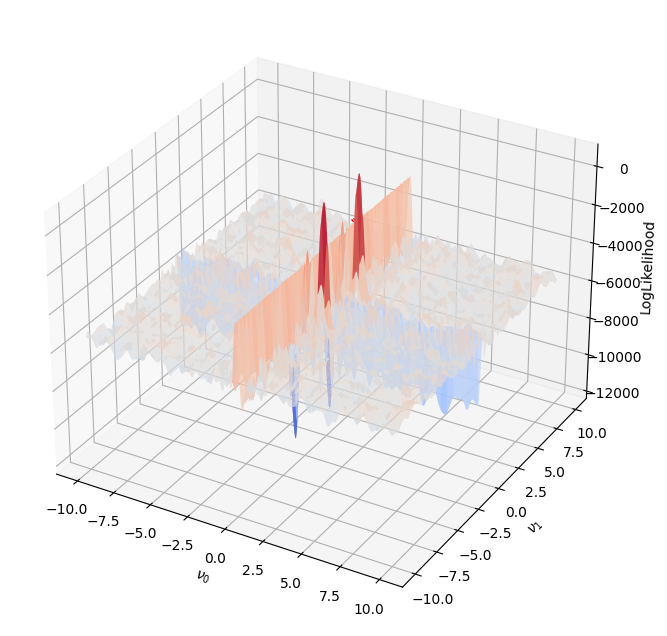

In [159]:
fig = plt.figure(figsize=(8, 8), facecolor="white")
ax = fig.add_subplot(projection='3d')

ax.plot_surface(X1,Y1,Z11,alpha=0.7,cmap='coolwarm',label='logLikelihood')

ax.set_xlabel('$\\nu_{0}$')
ax.set_ylabel('$\\nu_{1}$')
ax.set_zlabel('LogLikelihood')

ax.plot(np.array(theta_accept)[:,0],np.array(theta_accept)[:,1],Z1,'x',color='red',label='Accepted points')

plt.show()

\\icnas3.cc.ic.ac.uk\jq822\downloads\MResMCMC2023\06.08\MResMCMC2023-main\HMC\..\MCMC_DZ\MCMC\Statistic_tools.py:225: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


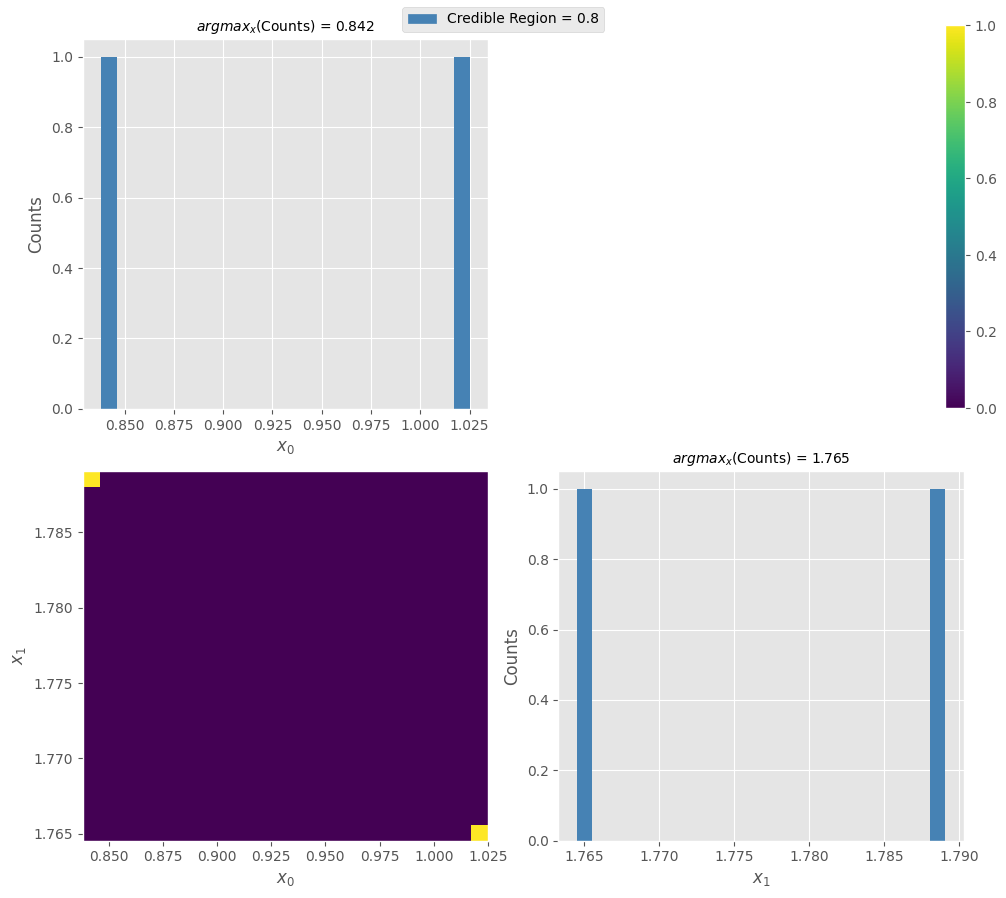

{0: [array([0.83815604, 0.84594472]), array([1.01729572, 1.0250844 ])],
 1: [array([1.76452391, 1.76554635]), array([1.78804002, 1.78906246])]}

In [160]:
densities_plot(Thetas=np.array(theta_accept), plot_axis=[], bins=24, burn_in=0, cr_1D=0.8)

### Sinusoidal Function

$$f(x) = \cos(2x+0.65)$$

<!-- $$\int \cos(2x+0.65) dx = 1/2 \sin(2x+13/20)$$ -->

$$P(f(x)) = -\frac{1}{4\pi\sqrt(1-(f(x))^2)}$$

In [ ]:
np.random.randn(100)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
def sinewave1(x, y):

    # Define the parameters of the sinusoidal function
    A = 1
    B = 2
    C = 0.65

    return A * np.cos(B * x + C) # Compute the z values

In [ ]:
from Sinusoidal_Function.Sinusoidal import Sinusoidal

In [ ]:
sinewave = Sinusoidal(A=np.array([1]),B=np.array([2]),C=np.array([0.65]),X_range=[[0,2*np.pi],[0,2]])

In [ ]:
sinewave.f(np.array([1,1]))

In [ ]:
# Generate a grid of tau and phi values
tau = np.linspace(0, 2*np.pi, 101)
phi = np.linspace(0, 2, 101)
# tau, phi = np.meshgrid(tau, phi)

amp = sinewave.f(np.column_stack([tau,phi]))

In [ ]:
amp

In [ ]:
# Create a 3D plot
fig = plt.figure(figsize=(10, 10)) # Set the figure size here (width, height)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(tau, phi, amp, cmap='viridis')
fig.colorbar(ax.plot_surface(tau, phi, amp, cmap='viridis'))

# Add labels
ax.set_xlabel('time')
ax.set_ylabel('position')
ax.set_zlabel('value')
ax.set_title('3D Sinusoidal Function')
#plt.savefig('3D Sinusoidal Function')
plt.show()

In [ ]:
def dfdx(mu):
    '''
    Central differencing scheme
    '''
    epsilon = 0.001
    n_dims = 2
    n_comp = 1
    mu = np.array(mu)
    delta_theta = []
    res_mu_plus = []
    # res_mu_minus = []
    for i in range(mu.shape[0]):
        E_plus = np.zeros(n_dims*n_comp)
        # E_minus = np.zeros(n_dims*n_comp)
        E_plus += [(epsilon if j == i else 0) for j in range(n_dims*n_comp)]
        # E_minus += [(-epsilon if j == i else 0) for j in range(n_dims*n_comp)]
        res_mu_plus.append(E_plus)
        # res_mu_minus.append(E_minus)

    for i in range(n_dims*n_comp):
        delta_thetai = ((sinewave.f(mu+res_mu_plus[i]) - sinewave.f(mu))/(2*epsilon))
        delta_theta.append(delta_thetai)
        
    return delta_theta

def U(theta):
    '''
    the potential energy function: 
    U(theta) = -log(probability distribution of theta)
    '''
    return - np.log(sinewave.f(theta))

def grad_U(theta):
    '''
    the derivative of the potential energy function
    dU/dmu
    '''
    DRho = dfdx(theta)
    Rho = - sinewave.f(theta)
    return np.array([dRho/Rho for dRho in DRho])

In [ ]:
epsilon = 0.001
n_dims = 2
n_comp = 1
mu = np.array([1,1])
delta_theta = []
res_mu_plus = []
res_mu_minus = []
for i in range(mu.shape[0]):
    E_plus = np.zeros(n_dims*n_comp)
    E_minus = np.zeros(n_dims*n_comp)
    E_plus += [(epsilon if j == i else 0) for j in range(n_dims*n_comp)]
    E_minus += [(-epsilon if j == i else 0) for j in range(n_dims*n_comp)]
    res_mu_plus.append(E_plus)
    res_mu_minus.append(E_minus)


In [ ]:
for i in range(n_dims*n_comp):
    delta_thetai = sinewave.f(mu+res_mu_plus[i]) - sinewave.f(mu)
    delta_theta.append(delta_thetai)

In [ ]:
dfdx([1,1])[0]

In [ ]:
- sinewave.f(np.array([1,1]))

In [ ]:
- sinewave.f(np.array([1,1])) / dfdx([1,1])

In [ ]:
theta_accept, theta_reject = HMC(epoch=3000, L=20, epsilon=0.01, U=U, grad_U=grad_U, current_theta=np.array([1,1]))